# topic name : functions transform 

In [66]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import FunctionTransformer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import scipy.stats as stats


In [24]:
data=pd.read_csv((r"C:\Users\mdfir\Downloads\train.csv"),usecols=["Age","Fare","Survived"])

In [26]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [32]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

C:\Users\mdfir\AppData\Local\Temp\ipykernel_12764\948062835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(),inplace=True)


In [36]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [42]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [46]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [52]:
x_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [54]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

C:\Users\mdfir\AppData\Local\Temp\ipykernel_12764\1778206156.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Age"])


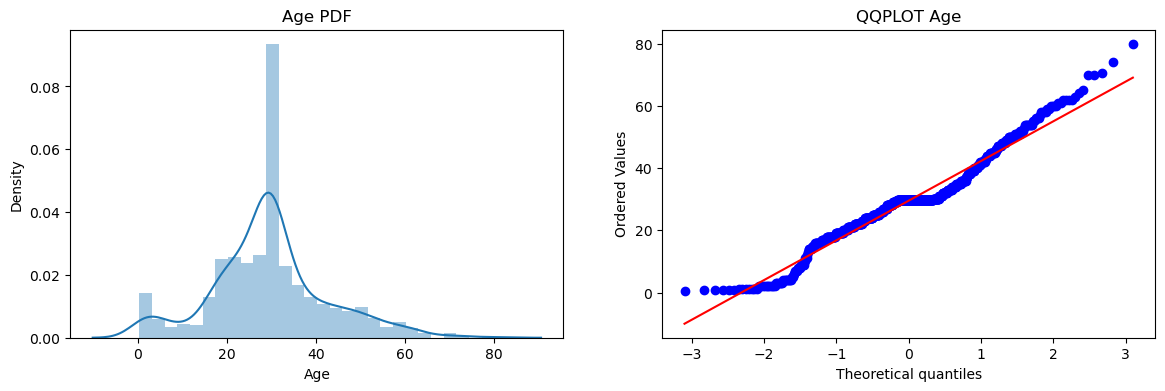

In [72]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(x_train["Age"],dist="norm",plot=plt)
plt.title("QQPLOT Age")
plt.show()


In [152]:
d=DecisionTreeClassifier()
l= LogisticRegression()

In [154]:
d.fit(x_train,y_train)
l.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [156]:
pred=d.predict(x_test)
y_pred=l.predict(x_test)

In [158]:
sore=accuracy_score( y_test,pred)

In [160]:
s=accuracy_score(y_test,y_pred)

In [162]:
print("dc:",accuracy_score(y_test,pred))
print("loges:",accuracy_score(y_test,y_pred))

dc: 0.659217877094972
loges: 0.6480446927374302


# use functions transform 

In [164]:
f=FunctionTransformer(func=np.log1p)

In [166]:
x_train_t=f.fit_transform(x_train)
x_test_t=f.transform(x_test)

In [168]:
model=DecisionTreeClassifier()
model_1= LogisticRegression()

In [170]:
model.fit(x_train_t,y_train)
model_1.fit(x_train_t,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [172]:
pred=model.predict(x_test_t)
y_pred=model_1.predict(x_test_t)

In [174]:
print("dc:",accuracy_score(y_test,pred))
print("loges:",accuracy_score(y_test,y_pred))

dc: 0.659217877094972
loges: 0.6815642458100558
